In [ ]:
print("hello")

hello


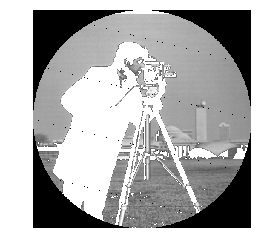

In [ ]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

camera = data.camera()
camera[:10] = 0
mask = camera < 87
camera[mask] = 255
inds_x = np.arange(len(camera))
inds_y = (4 * inds_x) % len(camera)
camera[inds_x, inds_y] = 0

l_x, l_y = camera.shape[0], camera.shape[1]
X, Y = np.ogrid[:l_x, :l_y]
outer_disk_mask = (X - l_x / 2)**2 + (Y - l_y / 2)**2 > (l_x / 2)**2
camera[outer_disk_mask] = 0

plt.figure(figsize=(4, 4))
plt.imshow(camera, cmap='gray')
plt.axis('off')
plt.show()

# Passing the image data read by PIL.Image.open() to np.array() returns 3D ndarray whose shape is (row (height), column (width), color (channel)).

In [ ]:
#The order of colors (channels) is RGB (red, green, blue). 
#Note that it is different from the case of reading with cv2.imread() of OpenCV.

In [ ]:
from PIL import Image
import numpy as np

im = np.array(Image.open('pic1.jpg'))

print(type(im))
# <class 'numpy.ndarray'>

print(im.dtype)
# uint8

print(im.shape)
# (225, 400, 3)
im[200,0]

<class 'numpy.ndarray'>
uint8
(276, 183, 3)


array([146, 175, 215], dtype=uint8)

If you convert the image to grayscale with convert('L') and then pass it to np.array(), it returns 2D ndarray whose shape is (row (height), column (width)).

In [ ]:
im_gray = np.array(Image.open('pic1.jpg').convert('L'))

print(im_gray.shape)
im_gray[:,0:6]

(276, 183)


array([[ 35,  35,  35,  35,  36,  36],
       [ 35,  35,  35,  36,  36,  36],
       [ 35,  35,  36,  36,  36,  37],
       ...,
       [114, 113, 113, 113, 112, 112],
       [115, 115, 114, 114, 114, 113],
       [115, 115, 115, 114, 114, 114]], dtype=uint8)

You can also get ndarray from PIL.Image with np.asarray(). np.array() returns a rewritable ndarray, while np.asarray() returns a non-rewritablendarray.

For np.array(), you can change the value of the element (pixel).

In [ ]:
print(im.flags.writeable)

print(im[0, 0, 0])

im[0, 0, 0] = 0

print(im[0, 0, 0])


True
0
0


#For np.asarray(), you cannot change value because rewriting is prohibited. 
It is possible to create a new ndarray based on the read ndarray.


In [ ]:
im_as = np.asarray(Image.open('pic1.jpg'))

print(type(im_as))


print(im_as.flags.writeable)

#im_as[0, 0, 0] = 0


<class 'numpy.ndarray'>
False


The data type dtype of the read ndarray is uint8 (8-bit unsigned integer).

If you want to process it as a floating point number float, you can convert it with astype() or specify the data type in the second argument of np.array() and np.asarray().

In [ ]:
im_f = im.astype(np.float64)
print(im_f.dtype)
# float64

im_f = np.array(Image.open('pic1.jpg'), np.float64)
print(im_f.dtype)

#f=Image.fromarray(im_f) will give error
# float64

float64
float64


# How to save NumPy array ndarray as image file

Passing ndarray to Image.fromarray() returns PIL.Image. It can be saved as an image file with save() method. The format of the saved file is automatically determined from the extension of the path passed in the argument of save().

In [ ]:
print(im.shape)
#changing the colors of the pic for 50 rows
for i in range(120,170,1):
    im[i] = 35

im[0, 1, 1] = 0
im[0, 100] = 0
im[1, 100] = 0

pil_img = Image.fromarray(im)
print(pil_img.mode)
pil_img.save('newpic.png')

(276, 183, 3)
RGB


A grayscale image (2D array) can also be passed to Image.fromarray(). mode automatically becomes 'L' (grayscale). It can be saved with save().

In [ ]:
pil_img_gray = Image.fromarray(im_gray)
print(pil_img_gray.mode)
# L

pil_img_gray.save('gray.jpg')

L


If the data type dtype of ndarray is float, etc., an error will occur, so it is necessary to convert to uint8.

In [ ]:
#pil_img = Image.fromarray(im_f)
# TypeError: Cannot handle this data type

pil_img = Image.fromarray(im_f.astype(np.uint8))
pil_img.save('pic1.jpg')

Note that if the pixel value is represented by 0.0 to 1.0, it is necessary to multiply by 255 and convert to uint8 and save.

# Get and set (change) pixel values

You can get the value of a pixel by specifying the coordinates at the index [row, columns] of ndarray. Note that the order is y, x in xy coordinates. The origin is the upper left.

# he colors of the ndarray obtained using Pillow are in RGB order,

In [ ]:
from PIL import Image
import numpy as np
im = np.array(Image.open('pic1.jpg'))
print(im.shape)

print(im[190, 150])

print(type(im[100, 150]))
# <class 'numpy.ndarray'>

(276, 183, 3)
[ 50 147 215]
<class 'numpy.ndarray'>


The above example shows the value at (y, x) = (100, 150), i.e. the 100th row and 150th column of pixels. As mentioned above, the colors of the ndarray obtained using Pillow are in RGB order, so the result is (R, G, B) = (111, 81, 109).

Unpack a tuple / list in Python

In [ ]:
R, G, B = im[100, 150]
print(R)
print(G)
print(B)

248
180
7


In [ ]:
#It is also possible to get the value by specifying the color.

In [ ]:
print(im[100, 150, 0])

print(im[100, 150, 1])

print(im[100, 150, 2])

248
180
7


You can also change to a new value. You can change RGB all at once, or you can change it with just a single color.

In [ ]:
im[100, 150] = (0, 50, 100)

print(im[100, 150])
# [  0  50 100]

im[100, 150, 0] = 150

print(im[100, 150])
# [150  50 100]
pil_img = Image.fromarray(im)
print(pil_img.mode)


pil_img.save('newpic1.jpg')

[  0  50 100]
[150  50 100]
RGB


# Generation of single color image and concatenation

Generate single-color images by setting other color values to 0, and concatenate them horizontally with np.concatenate(). You can also concatenate images using np.hstack() or np.c_[]

In [ ]:
import numpy as np

im = np.array(Image.open('pic2.jpg'))
print(im)
im_R = im.copy()
im_R[:, :, (1, 2)] = 0
im_G = im.copy()
im_G[:, :, (0, 2)] = 0
im_B = im.copy()
im_B[:, :, (0, 1)] = 0

im_RGB = np.concatenate((im_R, im_G, im_B), axis=1)
# im_RGB = np.vstack((im_R, im_G, im_B))
# im_RGB = np.c_['1', im_R, im_G, im_B]

pil_img = Image.fromarray(im_RGB)
pil_img.save('single_colorpic.jpg')

[[[244 253 250]
  [252 255 251]
  [245 244 239]
  ...
  [255 255 255]
  [253 253 253]
  [249 249 249]]

 [[249 255 253]
  [248 250 245]
  [255 255 250]
  ...
  [255 255 255]
  [255 255 255]
  [252 252 252]]

 [[252 255 255]
  [255 255 251]
  [ 96  91  87]
  ...
  [250 250 250]
  [253 253 253]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


# Negative / positive inversion (invert pixel value)

It is also easy to calculate and manipulate pixel values.

A negative-positive inverted image can be generated by subtracting the pixel value from the max value (255 for uint8).

In [ ]:
import numpy as np
from PIL import Image
#do it with gray image to get negative pic
#im = np.array(Image.open('img_tiger_grey.jpg').resize((256, 256)))
im = np.array(Image.open('img_tiger_grey.jpg').resize((256, 256)))
print(im[0:2])
im_i = 255 - im
print()
print(im_i[0:2])
Image.fromarray(im_i).save('neg-pos-tiger.png')


[[209 192 196 199 184 177 167 165 164 151 149 136 142 104 108 121 122 121
  115 102  67  56  42  39  33  28  24  22  22  22  27  19  21  27  16  50
   96 143 109 105 115 104  97 104 105 105  92 101  98  95  91  82  87  99
  101  76  95  79  83  90  86  78  72  67  67  71  74  65  65  66  66  66
   67  67  68  68  68  69  69  70  70  70  69  69  68  67  65  64  63  61
   61  61  60  60  59  59  59  57  57  57  57  57  57  57  52  55  53  70
   65  57  67  56  54  54  54  55  55  56  56  55  55  56  56  57  58  59
   59  61  60  60  59  59  59  58  61  62  62  63  64  64  65  64  67  72
   77  80  80  80  79  83  84  85  86  87  89  90  99  94  90  90  93  92
   86  80  73  73  72  70  68  67  67  63  63  63  63  63  63  63  63  55
   56  56  59  60  61  61  60  60  61  63  65  66  67  68  76  75  74  74
   73  72  72  73  73  72  72  71  70  69  69  76  77  77  78  79  79  80
   84  84  84  85  86  87  87  88  89  91  93  96  98 100 101 101 102 103
  105 107 110 111 115 115 115 116 116 

# Color reduction

Cut off the remainder of the division using // and multiply again, the pixel values become discrete and the number of colors can be reduced.

In [ ]:
import numpy as np
from PIL import Image
#without resizing
im = np.array(Image.open('pic2.jpg'))
              
print(im.shape)
for i in range(256):
    for j in range(230):
        im_32[i,j]=im[i,j]//92
        im_128[i,j]=im[i,j]//28 

print("shape of im",im.shape)
print("shape of im",im_32.shape)
print("shape of im",im_128.shape)
im_dec = np.concatenate((im, im_32, im_128), axis=1)

Image.fromarray(im_dec).save('pic_color_reduce.jpg')

(191, 263, 3)


IndexError: index 191 is out of bounds for axis 0 with size 191

You can do anything you want with pixel values, such as multiplication, division, exponentiation, etc.

You don't need to use the for loop because the entire image can be calculated as it is.

In [ ]:
import numpy as np
from PIL import Image

im = np.array(Image.open('pic2.jpg').resize((256, 256)))
im_32 = im//92*92
im_128 = im//158*158

im_dec = np.concatenate((im, im_32, im_128), axis=1)

Image.fromarray(im_dec).save('pic_color_reduce2.jpg')

# Image binarization with NumPy

Image binarization is the process of taking a grayscale image and converting it to black-and-white, essentially reducing the information contained within the image from 256 shades of gray to 2: black and white, a binary image. ... This is a task commonly performed when trying to extract an object from an image

It is also possible to assign to black and white according to the threshold.
As a simple example, binarize a grayscale image.

In [ ]:
import numpy as np
from PIL import Image

im_gray = np.array(Image.open('img_ganesha.jpg').convert('L'))
print(type(im_gray))
# <class 'numpy.ndarray'>

<class 'numpy.ndarray'>


In [ ]:
#Using the comparison operator on a NumPy array ndarray returns a boolean
#ndarray comparing each element of the array.thresh = 128

im_bool = im_gray > thresh
print(im_bool)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ...  True  True  True]]


Since True is regarded as 1 and False is regarded as 0, when multiplied by 255 which is the Max value of uint8, True becomes 255 (white) and False becomes 0 (black).

In [ ]:
maxval = 255

im_bin = (im_gray > thresh) * maxval
print(im_bin)
Image.fromarray(np.uint8(im_bin)).save('img_bin.jpg')

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ... 255 255 255]]


For color image
By applying different values ​​to each RGB color, you can create a colorful image.

Generate a three-dimensional empty ndarray with np.empty() and store results of multiplying each color (each channel) by each values.

The size (height, width) obtained by shape is expanded by * and specified in np.empty().

In [ ]:
im_bool = im_gray > 128
im_dst = np.empty((*im_gray.shape, 3))
r, g, b = 255, 128, 32

im_dst[:, :, 0] = im_bool * r
im_dst[:, :, 1] = im_bool * g
im_dst[:, :, 2] = im_bool * b

Image.fromarray(np.uint8(im_dst)).save('img_ganesha.jpg')

Generate an empty ndarray and store each result in each color (each channel). Since the original is a color image (three-dimensional array), np.empty_like() is used.

In [ ]:
im = np.array(Image.open('img_ganesha.jpg'))

im_th = np.empty_like(im)

thresh = 128
maxval = 255

for i in range(3):
    im_th[:, :, i] = (im[:, :, i] > thresh) * maxval

Image.fromarray(np.uint8(im_th)).save('img_ganesha.jpg')

# Trimming with slice :
By specifying an area with slice, you can trim it to a rectangle.

In [ ]:
import numpy as np

im = np.array(Image.open('pic1.jpg'))

print(im.shape)


im_trim1 = im[128:180, 128:188]
print(im_trim1.shape)
# (256, 256, 3)

Image.fromarray(im_trim1).save('after_trim.jpg')

(276, 183, 3)
(52, 55, 3)


It may be convenient to define a function that specifies the upper left coordinates and the width and height of the area to be trimmed.

In [ ]:
def trim(array, x, y, width, height):
    return array[y:y + height, x:x+width]
#[50:100, 50:100]
print(im.shape)
im_trim2 = trim(im, 50, 50, 50, 50)
print(im_trim2.shape)


Image.fromarray(im_trim2).save('trim.jpg')

(276, 183, 3)
(50, 50, 3)


# Split with slice or function

In [ ]:
import numpy as np

im = np.array(Image.open('pic1.jpg').resize((256, 256)))

print(im.shape)
# (256, 256, 3)

im_0 = im[:, :100]
im_1 = im[:, 100:]

print(im_0.shape)
# (256, 100, 3)

print(im_1.shape)
# (256, 156, 3)

Image.fromarray(im_0).save('after_split.jpg')
Image.fromarray(im_1).save('after_split_1.jpg')

(256, 256, 3)
(256, 100, 3)
(256, 156, 3)


It is also possible to split the image with NumPy function.

np.hsplit() splits ndarray horizontally. If an integer value is specified for the second argument, ndarray is splitted equally.

In [ ]:
im_0, im_1 = np.hsplit(im, 2)

print(im_0.shape)
# (256, 128, 3)

print(im_1.shape)
# (256, 128, 3)

(256, 128, 3)
(256, 128, 3)


If a list is specified as the second argument, ndarray is splitted at the position of that values.

In [ ]:
im_0, im_1, im_2 = np.hsplit(im, [100, 150])

print(im_0.shape)

print(im_1.shape)

print(im_2.shape)


(256, 100, 3)
(256, 50, 3)
(256, 106, 3)


#np.vsplit() splits ndarray vertically. The usage of np.vsplit() is the same as np.hsplit().
#When an integer value is specified as the second argument with np.hsplit() or np.vsplit(), an error will occur if it cannot be splitted equally. np.array_split() adjusts the size appropriately and splits it.

In [ ]:
# ValueError: array split does not result in an equal division

im_0, im_1, im_2 = np.array_split(im, 3, axis=1)

print(im_0.shape)

print(im_1.shape)

print(im_2.shape)
Image.fromarray(im_0).save('n1.jpg')
Image.fromarray(im_1).save('n2.jpg')
Image.fromarray(im_2).save('n3.jpg')

(276, 61, 3)
(276, 61, 3)
(276, 61, 3)


# Paste with slice

By using this, a part of the image or the entire image can be pasted to another image.

In [ ]:
from PIL import Image

src = np.array(Image.open('pic1.jpg').resize((128, 128)))
dst = np.array(Image.open('pic2.jpg').resize((256, 256))) // 4 #to change color

dst_copy = dst.copy()
dst_copy[64:128, 128:192] = src[32:96, 32:96] #should be same

Image.fromarray(dst_copy).save('n1.jpg')

#Note that an error will occur if the size of the area specified on the left side differs from the size of the area specified on the right side.

In [ ]:
dst_copy = dst.copy()
dst_copy[64:192, 64:192] = src

Image.fromarray(dst_copy).save('n2.jpg')

# Alpha blending and masking

By the operation for each element (= pixel) of the array, two images can be alpha-blended or composited based on a mask image. See the following articles for details.

In [ ]:
from PIL import Image

src1 = np.array(Image.open('pic1.jpg'))
print(src1.shape[1::-1])
src2 = np.array(Image.open('pic2.jpg').resize(src1.shape[1::-1], Image.BILINEAR))

print(src1.dtype)

dst = src1 * 0.5 + src2 * 0.5

print(dst.dtype)
# float64

Image.fromarray(dst.astype(np.uint8)).save('after_blending.jpg')

(183, 276)
uint8
float64


Use clip() to clip pixel values to the range 0 to 255. Note that unexpected results occur when saving as an image file if there is a value exceeding the maximum value 255 of uint8.

In [ ]:
dst = src1 * 0.5 + src2 * 0.2 + (96, 128, 160)

print(dst.max())

dst = dst.clip(0, 255)

print(dst.max())


Image.fromarray(dst.astype(np.uint8)).save('after_blending1.jpg')

338.5
255.0


# Rotate and flip

The NumPy function that rotates ndarray is np.rot90().

Specify the original ndarray as the first argument, and the number of times to rotate 90 degrees as the second argument.

When the second argument is omitted, the default rotation is 90 degrees counterclockwise, and when the second argument is 2 and 3, the rotation is 180 degrees and 270 degrees counterclockwise. See the following articles for details.

In [ ]:
import numpy as np
from PIL import Image

img = np.array(Image.open('pic1.jpg'))
print(type(img))
# <class 'numpy.ndarray'>

print(img.shape)
# (225, 400, 3)

Image.fromarray(np.rot90(img)).save('rotate_90.jpg')

Image.fromarray(np.rot90(img, 2)).save('rotate_180.jpg')

Image.fromarray(np.rot90(img, 3)).save('rotate_270.jpg')

<class 'numpy.ndarray'>
(276, 183, 3)


Here, the image file is read and written by using Pillow(PIL), but when reading and writing with OpenCV as in the example above, you can also use the NumPy function instead of the OpenCV function to process the rotation. Both are just rotating ndarray.

Flip image with NumPy: np.flip()

The NumPy function that flips ndarray vertically and horizontally is np.flip(). There are also np.flipud() which flips vertically (up and down) and np.fliplr() which flips horizontally (left and right).

You can flip ndarray only vertically or horizontally by specifying an argument of np.flip(), but it is easier to use np.flipud() and np.fliplr().

If you want to flip ndarray both vertically and horizontally, you need to use np.flip (). See the following article for details.

In [ ]:
#Image.img.thumbnail((128,128))
box = (100,100,400,400)
im.crop(box)
#region = IMAGE.crop(box)

AttributeError: 'numpy.ndarray' object has no attribute 'crop'

In [ ]:
from PIL import Image

img = np.array(Image.open('pic2.jpg'))
print(type(img))
# <class 'numpy.ndarray'>

print(img.shape)

Image.fromarray(np.flipud(img)).save('flipup_down.jpg')

Image.fromarray(np.fliplr(img)).save('flipleft_right.jpg')

Image.fromarray(np.flip(img, 1)).save('flipud_lr.jpg')




<class 'numpy.ndarray'>
(191, 263, 3)


# Block views on images/arrays

Block views can be incredibly useful when one wants to perform local operations on non-overlapping image patches.

We use astronaut from skimage.data and virtually ‘slice’ it into square blocks. Then, on each block, we either pool the mean, the max or the median value of that block. The results are displayed altogether, along with a spline interpolation of order 3 rescaling of the original astronaut image.

128


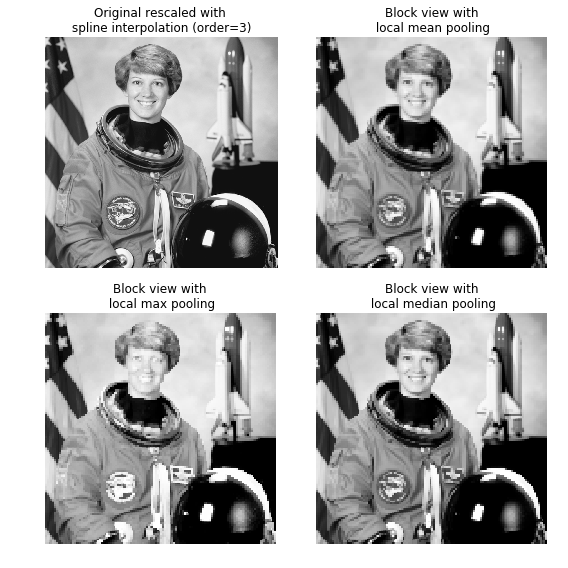

In [ ]:
import numpy as np
from scipy import ndimage as ndi
from matplotlib import pyplot as plt
import matplotlib.cm as cm

from skimage import data
from skimage import color
from skimage.util import view_as_blocks


# get astronaut from skimage.data in grayscale
l = color.rgb2gray(data.astronaut())

# size of blocks
block_shape = (4, 4)

# see astronaut as a matrix of blocks (of shape block_shape)
view = view_as_blocks(l, block_shape)
print(view.shape[0])
# collapse the last two dimensions in one
flatten_view = view.reshape(view.shape[0], view.shape[1], -1)

# resampling the image by taking either the `mean`,
# the `max` or the `median` value of each blocks.
mean_view = np.mean(flatten_view, axis=2)
max_view = np.max(flatten_view, axis=2)
median_view = np.median(flatten_view, axis=2)

# display resampled images
fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

l_resized = ndi.zoom(l, 2, order=3)
ax[0].set_title("Original rescaled with\n spline interpolation (order=3)")
ax[0].imshow(l_resized, extent=(-0.5, 128.5, 128.5, -0.5),
             cmap=cm.Greys_r)

ax[1].set_title("Block view with\n local mean pooling")
ax[1].imshow(mean_view, cmap=cm.Greys_r)

ax[2].set_title("Block view with\n local max pooling")
ax[2].imshow(max_view, cmap=cm.Greys_r)

ax[3].set_title("Block view with\n local median pooling")
ax[3].imshow(median_view, cmap=cm.Greys_r)

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

In [ ]:
import numpy as np
from skimage.util.shape import view_as_blocks
A = np.arange(4*4).reshape(4,4)

B = view_as_blocks(A, block_shape=(2, 2))
#1st quad
print(B[0, 0])

#2nd quad
print(B[0, 1])

#3rd quad
B[1, 0, 1, 1]
#will show 13

A = np.arange(4*4*6).reshape(4,4,6)
print(A)
B = view_as_blocks(A, block_shape=(1, 2, 2))
print("shape of b is ",B.shape)

print(B[2:, 0, 2])  # doctest: +NORMALIZE_WHITESPACE


[[0 1]
 [4 5]]
[[2 3]
 [6 7]]
[[[ 0  1  2  3  4  5]
  [ 6  7  8  9 10 11]
  [12 13 14 15 16 17]
  [18 19 20 21 22 23]]

 [[24 25 26 27 28 29]
  [30 31 32 33 34 35]
  [36 37 38 39 40 41]
  [42 43 44 45 46 47]]

 [[48 49 50 51 52 53]
  [54 55 56 57 58 59]
  [60 61 62 63 64 65]
  [66 67 68 69 70 71]]

 [[72 73 74 75 76 77]
  [78 79 80 81 82 83]
  [84 85 86 87 88 89]
  [90 91 92 93 94 95]]]
shape of b is  (4, 2, 3, 1, 2, 2)
[[[[52 53]
   [58 59]]]


 [[[76 77]
   [82 83]]]]
